## 1. Unzip Dataset

In [ ]:
%cd '/content/drive/MyDrive/Project DTS/Source Code/Dataset'

/content/drive/MyDrive/Project DTS/Source Code/Dataset


In [ ]:
!unzip Handwritting.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

## 2. Import Library

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import save_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization,  Reshape

## 3. EDA


*   Mengecek data
*   Visualisasi data







In [ ]:
df_train = pd.read_csv('written_name_train_v2.csv')
df_valid = pd.read_csv('written_name_validation_v2.csv')
df_test = pd.read_csv('written_name_test_v2.csv')

In [ ]:
df_test.head()

,FILENAME,IDENTITY
0,TEST_0001.jpg,KEVIN
1,TEST_0002.jpg,CLOTAIRE
2,TEST_0003.jpg,LENA
3,TEST_0004.jpg,JULES
4,TEST_0005.jpg,CHERPIN


In [ ]:
df_train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [ ]:
df_valid.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41300 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


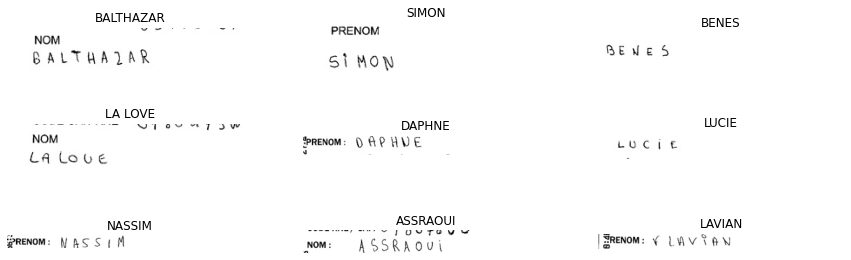

In [ ]:
plt.figure(figsize=(15, 5))
#Data Training
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'train_v2/train/'+df_train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(df_train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.show()

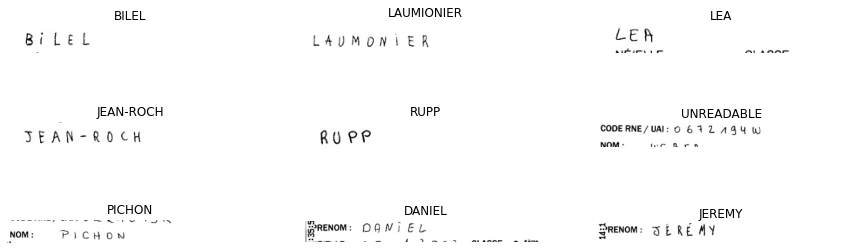

In [ ]:
plt.figure(figsize=(15, 5))
#Data Validation
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'validation_v2/validation/'+df_valid.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(df_valid.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.show()

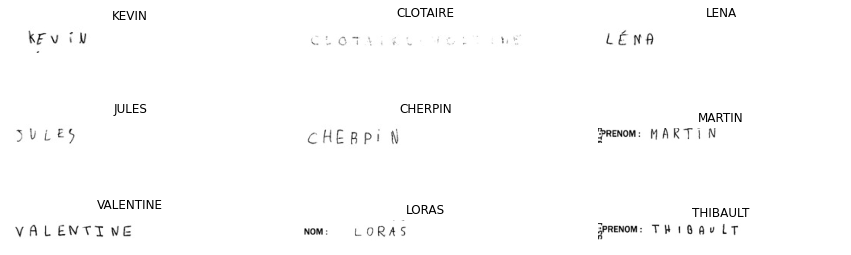

In [ ]:
plt.figure(figsize=(15, 5))
#Data Validation
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'test_v2/test/'+df_test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(df_test.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.show()

In [ ]:
each_label_train = df_train.IDENTITY.unique()
each_label_val = df_valid.IDENTITY.unique()
each_label_test = df_test.IDENTITY.unique()

In [ ]:
print('Banyak Label pada data Training :',len(each_label_train))
print('Banyak Label pada data Validasi :',len(each_label_val))
print('Banyak Label pada data Test :',len(each_label_test))

Banyak Label pada data Training : 100540
Banyak Label pada data Validasi : 20228
Banyak Label pada data Test : 20280


## 4. Preprocessing


*   Menghapus data NULL
*   Menghapus label Readable
*   Meminimalisir label dan image





In [ ]:
df_train.dropna(axis=0, inplace=True)
df_valid.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330396 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330396 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41292 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41292 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 967.8+ KB


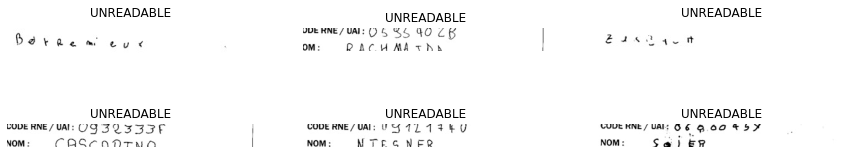

In [ ]:
unreadable = df_train[df_train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace = True, drop=True)

plt.figure(figsize=(15, 5))

for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'train_v2/train/'+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')
plt.show()

In [ ]:
df_train = df_train[df_train['IDENTITY'] != 'UNREADABLE']
df_valid = df_valid[df_valid['IDENTITY'] != 'UNREADABLE']

In [ ]:
print('Banyak Label pada data Training :',len(df_train.IDENTITY.unique()))
print('Banyak Label pada data Validasi :',len(df_valid.IDENTITY.unique()))

Banyak Label pada data Training : 100538
Banyak Label pada data Validasi : 20226


In [ ]:
df_train['IDENTITY'] = df_train['IDENTITY'].str.upper()
df_valid['IDENTITY'] = df_valid['IDENTITY'].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print('Banyak Label pada data Training :',len(df_train.IDENTITY.unique()))
print('Banyak Label pada data Validasi :',len(df_valid.IDENTITY.unique()))

Banyak Label pada data Training : 100525
Banyak Label pada data Validasi : 20225


In [ ]:
df_train.reset_index(inplace = True, drop=True) 
df_valid.reset_index(inplace = True, drop=True)

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    final_img = np.ones([64, 256])*255
    # crop
    if w > 256:
        img = img[:, :256]
    if h > 64:
        img = img[:64, :] 
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

def crop_img(train_size, valid_size) :
    train_x = []
    valid_x = []

    for i in range(train_size):
        img_dir = 'train_v2/train/'+df_train.loc[i, 'FILENAME']
        image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
        image = preprocess(image)
        image = image/255.
        train_x.append(image)

    for i in range(valid_size):
        img_dir = 'validation_v2/validation/'+df_valid.loc[i, 'FILENAME']
        image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
        image = preprocess(image)
        image = image/255.
        valid_x.append(image)
    #Mengubah bentuk array
    train_x = np.array(train_x).reshape(-1, 256, 64, 1)
    valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)
    return train_x, valid_x

In [ ]:
train_size = 5000
valid_size = 500 
train_x, valid_x = crop_img(train_size, valid_size)

In [ ]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24
num_of_characters = len(alphabets) + 1 
num_of_timestamps = 64 

def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))      
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1: 
            break
        else:
            ret+=alphabets[ch]
    return ret

In [ ]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(df_train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(df_train.loc[i, 'IDENTITY'])]= label_to_num(df_train.loc[i, 'IDENTITY'])    

In [ ]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(df_valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(df_valid.loc[i, 'IDENTITY'])]= label_to_num(df_valid.loc[i, 'IDENTITY'])    

In [ ]:
print('True label : ',df_train.loc[2, 'IDENTITY'] , '\ntrain_y : ',train_y[2],'\ntrain_label_len : ',train_label_len[2], 
      '\ntrain_input_len : ', train_input_len[2])

True label :  BENES 
train_y :  [ 1.  4. 13.  4. 18. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.] 
train_label_len :  [5.] 
train_input_len :  [62.]


## Model 1

In [ ]:
input_data = Input(shape=(256, 64, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization_25 (Bat  (None, 256, 64, 32)      128       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 128, 32, 64)       18496     
                                                           

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    patience=9,
    monitor='val_loss',
    restore_best_weights = True,
)

In [ ]:
# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=tf.keras.optimizers.Adam(0.0015))

history = model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=50, batch_size=64)

Epoch 1/50
79/79 [==============================] - 23s 197ms/step - loss: 23.8804 - val_loss: 20.8478
Epoch 2/50
79/79 [==============================] - 13s 170ms/step - loss: 20.2617 - val_loss: 20.5883
Epoch 3/50
79/79 [==============================] - 14s 181ms/step - loss: 19.8434 - val_loss: 21.6083
Epoch 4/50
79/79 [==============================] - 16s 199ms/step - loss: 19.2520 - val_loss: 25.6144
Epoch 5/50
79/79 [==============================] - 12s 159ms/step - loss: 18.6875 - val_loss: 23.8878
Epoch 6/50
79/79 [==============================] - 17s 212ms/step - loss: 17.9281 - val_loss: 24.1782
Epoch 7/50
79/79 [==============================] - 12s 148ms/step - loss: 16.0802 - val_loss: 22.2688
Epoch 8/50
79/79 [==============================] - 12s 153ms/step - loss: 12.6231 - val_loss: 29.5297
Epoch 9/50
79/79 [==============================] - 12s 157ms/step - loss: 9.1723 - val_loss: 19.3272
Epoch 10/50
79/79 [==============================] - 14s 173ms/step - loss

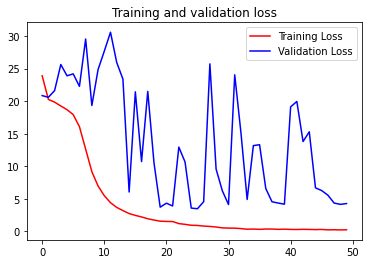

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
y_true = df_valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))

Correct characters predicted : 71.51%


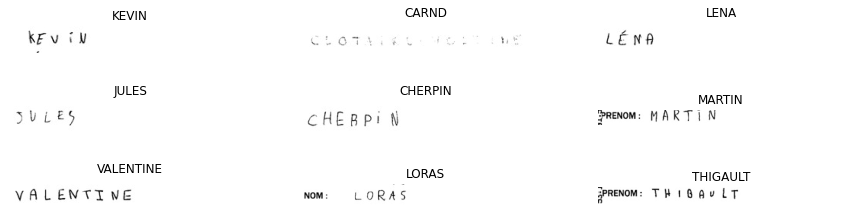

In [ ]:
plt.figure(figsize=(15, 10))
random.randint(0,41370)
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'test_v2/test/'+df_test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
model.save('HR_model1.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('HR_model1.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjila478d/assets


INFO:tensorflow:Assets written to: /tmp/tmpjila478d/assets


ConverterError: ignored

## Model 2

In [ ]:
input_data = Input(shape=(256, 64, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)
inner = Dropout(0.5)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max2')(inner)
inner = Dropout(0.5)(inner)

inner = Reshape(target_shape=((128,2048)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

inner = Bidirectional(LSTM(128, return_sequences=True), name = 'lstm1')(inner)

inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization_48 (Bat  (None, 256, 64, 32)      128       
 chNormalization)                                                
                                                                 
 activation_38 (Activation)  (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 dropout_51 (Dropout)        (None, 128, 32, 32)       0         
                                                          

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=tf.keras.optimizers.Adam(0.0015))

history = model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=50, batch_size=64)

Epoch 1/50
79/79 [==============================] - 21s 222ms/step - loss: 23.8083 - val_loss: 21.6077
Epoch 2/50
79/79 [==============================] - 15s 194ms/step - loss: 20.8137 - val_loss: 22.2314
Epoch 3/50
79/79 [==============================] - 16s 197ms/step - loss: 20.6849 - val_loss: 21.6052
Epoch 4/50
79/79 [==============================] - 15s 186ms/step - loss: 20.5466 - val_loss: 21.3018
Epoch 5/50
79/79 [==============================] - 18s 229ms/step - loss: 20.4542 - val_loss: 20.9467
Epoch 6/50
79/79 [==============================] - 13s 160ms/step - loss: 20.3723 - val_loss: 20.6953
Epoch 7/50
79/79 [==============================] - 28s 364ms/step - loss: 20.3049 - val_loss: 20.6059
Epoch 8/50
79/79 [==============================] - 15s 196ms/step - loss: 20.1588 - val_loss: 21.2578
Epoch 9/50
79/79 [==============================] - 15s 187ms/step - loss: 19.8467 - val_loss: 21.8018
Epoch 10/50
79/79 [==============================] - 16s 203ms/step - los

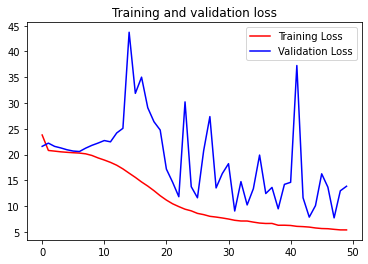

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
y_true = df_valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))

Correct characters predicted : 57.41%


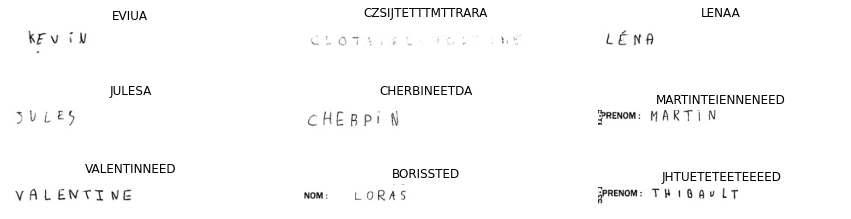

In [ ]:
plt.figure(figsize=(15, 10))
random.randint(0,41370)
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img_dir = 'test_v2/test/'+df_test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
model.save('HR_model2.h5')